In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [92]:
cols_banknote=['variance of Wavelet Transformed image','skewness of Wavelet Transformed image','curtosis of Wavelet Transformed image','entropy of image','class']
df_disease=pd.read_csv('./Dataset/kidney_disease.csv',dtype=object) 
df_banknote=pd.read_csv('./Dataset/data_banknote_authentication.txt',names=cols_banknote)

In [93]:
col_disease_num=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
col_disease_str=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']
y_disease=['classifiaction']

In [109]:
df_disease.shape

(400, 26)

In [104]:
for col in col_disease_str:
    print(df_disease[col].value_counts())
    print('----------------------------')

normal      353
abnormal     47
Name: rbc, dtype: int64
----------------------------
normal      324
abnormal     76
Name: pc, dtype: int64
----------------------------
notpresent    358
present        42
Name: pcc, dtype: int64
----------------------------
notpresent    378
present        22
Name: ba, dtype: int64
----------------------------
no     253
yes    147
Name: htn, dtype: int64
----------------------------
no     263
yes    137
Name: dm, dtype: int64
----------------------------
no     366
yes     34
Name: cad, dtype: int64
----------------------------
good    318
poor     82
Name: appet, dtype: int64
----------------------------
no     324
yes     76
Name: pe, dtype: int64
----------------------------
no     340
yes     60
Name: ane, dtype: int64
----------------------------
ckd       250
notckd    150
Name: classification, dtype: int64
----------------------------


In [103]:
#Replace incorrect values
df_disease['dm'] =df_disease['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df_disease['cad'] = df_disease['cad'].replace(to_replace = '\tno', value='no')
df_disease['classification'] = df_disease['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [94]:
# replace missing values of the disease dataset
for col in col_disease_num:
    df_disease[col]=pd.to_numeric(df_disease[col], errors='coerce')
    df_disease[col].fillna(df_disease[col].median(), inplace = True)
for col in col_disease_str:
    df_disease[col]=df_disease[col].astype('category')
    df_disease[col].fillna(df_disease[col].mode()[0], inplace = True)

In [95]:
# Standardization of datasets to : Gaussian with zero mean and unit variance.
def standardization(dataset, dict_col):
    dataset[dict_col]=preprocessing.scale(dataset[dict_col])
    return dataset

In [96]:
df_disease=standardization(df_disease, col_disease_num)
df_banknote=standardization(df_banknote, df_banknote.columns)

In [106]:
# code category data
def labelEncoding(dataset,col):
    dataset[col], mapping_index = pd.Series(dataset[col]).factorize()
    print(col)
    print(mapping_index)
    print("-----------------------------------------")
    return dataset[col],mapping_index


In [107]:
for col in col_disease_str:
    df_disease[col],mapping_index=labelEncoding(df_disease,col)
    #print(df_disease[col].value_counts())
    #print('-----------------------------------------------')

rbc
CategoricalIndex(['normal', 'abnormal'], categories=['abnormal', 'normal'], ordered=False, dtype='category')
-----------------------------------------
pc
CategoricalIndex(['normal', 'abnormal'], categories=['abnormal', 'normal'], ordered=False, dtype='category')
-----------------------------------------
pcc
CategoricalIndex(['notpresent', 'present'], categories=['notpresent', 'present'], ordered=False, dtype='category')
-----------------------------------------
ba
CategoricalIndex(['notpresent', 'present'], categories=['notpresent', 'present'], ordered=False, dtype='category')
-----------------------------------------
htn
CategoricalIndex(['yes', 'no'], categories=['no', 'yes'], ordered=False, dtype='category')
-----------------------------------------
dm
Index(['yes', 'no'], dtype='object')
-----------------------------------------
cad
CategoricalIndex(['no', 'yes'], categories=['no', 'yes'], ordered=False, dtype='category')
-----------------------------------------
appet
Categori

In [108]:
df_disease.classification.value_counts()

0    250
1    150
Name: classification, dtype: int64

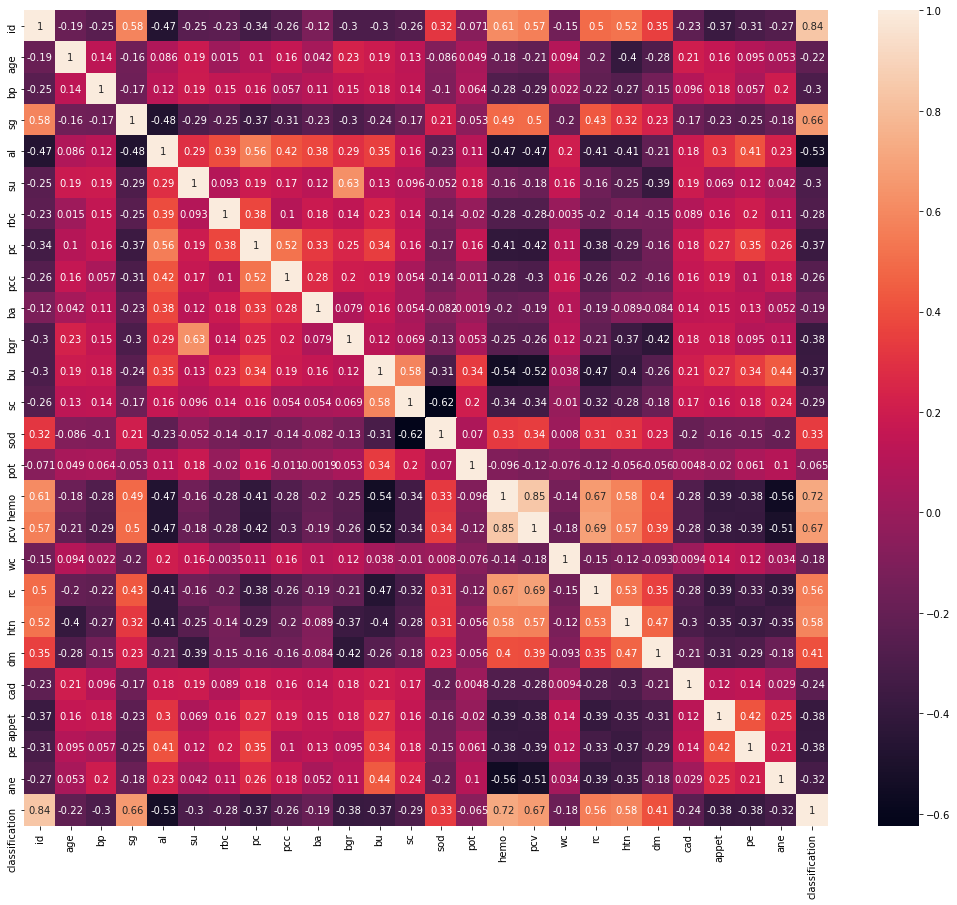

In [88]:
# show correlation matrix
corrMatrix = df_disease.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

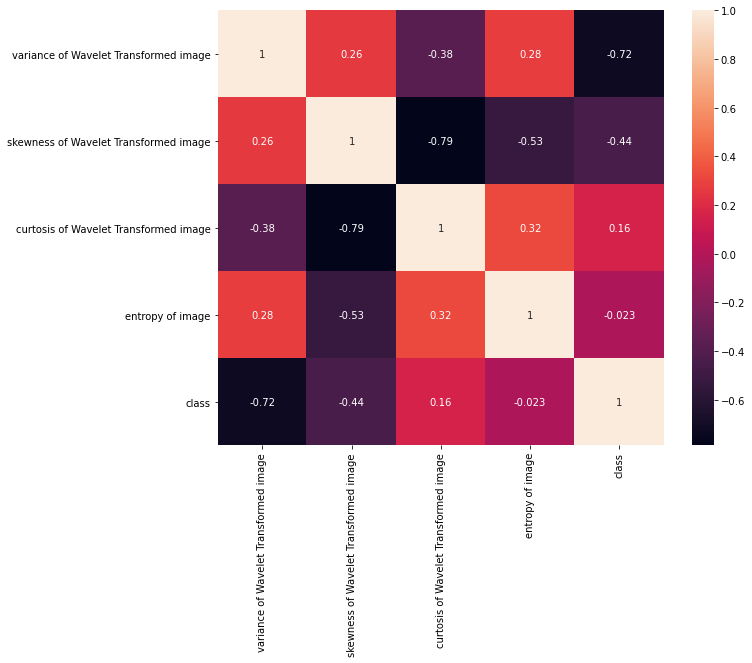

In [87]:
corrMatrix = df_banknote.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_disease.iloc[:,:-1], df_disease.iloc[:,-1], test_size = 0.2, random_state=44 )